In [3]:
pip install yfinance

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [4]:
pip install update pandas_datareader

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [5]:
pip install tqdm

--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/Library/

In [6]:
from tqdm import tqdm, trange

In [7]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import ranksums
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from arch import arch_model
from multiprocessing import Pool

%matplotlib inline

In [8]:
yf.pdr_override()

In [12]:
# here we look at stcoks from all the sectors of the market
sectors = ['Tech','Healthcare','Financial','Consumer_D','Consumer_S','Industrial','Energy','Utility','Market_ETF']
Tech_stocks=['AAPL','MSFT','NVDA','ADBE','CRM','GOOGL','AMZN','IBM','INTC','CSCO']
Healthcare_stocks=['JNJ','PFE','MRK','GILD','AMGN','BMY','LLY','REGN','UNH']
Financial_stocks=["JPM", "BAC", "WFC", "C", "GS", "MS", "V", "MA", "AXP", "SCHW"]
Consumer_D_stocks = ["HD", "MCD", "NKE", "SBUX", "DIS", "CMCSA", "LOW", "F", "BKNG"] # Consumer discretionary
Consumer_S_stocks= ["PG", "KO", "PEP", "WMT", "CL", "KMB", "CLX", "MDLZ", "EL"] #Consumer Staples
Industrial_stocks = ["BA", "GE", "MMM", "HON", "CAT", "RTX", "LMT", "GD", "UNP", "FDX"]
Energy_stocks = ["XOM", "CVX", "BP", "COP", "EOG", "OXY", "SLB", "WMB"]
Utility_stocks = ["NEE", "DUK", "D", "SO", "EXC", "AEP", "SRE", "XEL", "WEC", "AWK"]
Market_ETF_stocks = ['SPY','QQQ']

### Asset selection for tests
Selected a basket of stocks from each sector for running and analysing the stocks and their sector wise dependence.

pros- can identify the sector wise dependence of stocks on indicators 

cons - survivorship bias as some stocks might delisted or just added 
overfitting bias as we are cherry picking stocks based on p value 


In [110]:
lookbacks=[9,20,50,100,200]
strat_lookbacks = [9,20,30,50,75,100,150,200]
fixed_stoplosses = [None,0.5,1,2,3,4,5]

In [14]:
start='2005-01-01'
end='2010-01-01'

# Strategy Hypothesis

Use one tailed paired t-test for confirming this hypothesis

Instead of checking for daily returns we are going to check for cummulative returns.
we can do this by testing the strategy compared to that of a benchmark strategy sucha s a buy and hold. 
we test the hypothesis that the cummulative returns generated by the strategy are not different from that generated by the Buy and hold strategy 

# MA Hypothesis

### Indicators
Trade indicators 
*   Simple/Exponential moving average price - with different lookbacks 
*   Fixed Stoplosses 
*   Historical Volatility of returns
*   Volatility from GARCH fit on Returns 

Risk Indicators 
*   Fixed - fixed percentage value for all trades 
*   Flexible - value changes per trade based on 30 day GARCH volatility, or other parameters open to further research

### signals
*   signal(1) - previous close and current open crossing above VWAP
*   signal(2) - previous close and current open crossing below VWAP

### rules
*   long entry - close crossing above VWAP signal(1) - enter at days open
*   long exit - close crossing below VWAP signal(2) - exit at days open
*   short entry - close crossing below VWAP signal(2) - enter at days open
*   short exit - close crossing above VWAP signal(1) - exit at days open

### Risk Management - Fixed 
*   long trades fixed risk - checks if day's Low is below the Stoploss determined at entry
*   short trades fixed risk - checks if day's Low is above the Stoploss determined at entry

### Risk Management - Flexible 
*   long trades flexible risk - checks if day's Low is below the Stoploss determined at entry
*   short trades flexible risk - checks if day's Low is above the Stoploss determined at entry



In [29]:
def fit_garch(data):
    '''This function is used to fit a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model on the provided data. 
    It returns the conditional volatility of the last data point. 
    The GARCH model is a statistical model used to estimate the volatility of stock returns.'''
    model = arch_model(data, vol='Garch', p=1, q=1)
    model_fit = model.fit(disp='off')
    return model_fit.conditional_volatility[-1]

In [83]:
def data_prep_MA2(symbol,lookback,start,end,Garch_lookback=None,Vol_lookback=None,smoothing_choice="s"):
  # Calculate the cumulative sum of price times volume
  df = yf.download(symbol,start,end)
  # Calculate the rolling MAs
  if smoothing_choice=='s':
    df['MA']=df['Close'].rolling(window=lookback).mean()
  elif smoothing_choice=='e':
    df['MA']=df['Close'].ewm(span=lookback, adjust=False).mean()
  df["day's return"]=(df['Close']-df['Open'])/df['Open']
  df['returns']=(df['Close']-df['Close'].shift(1))/df['Close'].shift(1)
  if Vol_lookback != None:
    df['vol']=df['returns'].rolling(Vol_lookback).std()*100
    df['upper_band']=df['Open']*(1+df['vol']/100)
    df['lower_band']=df['Open']*(1-df['vol']/100)
  if Garch_lookback != None:
    df['scaled_returns']=df['returns']*100
    windows = [df.iloc[i-Garch_lookback:i]['scaled_returns'] for i in range(Garch_lookback, len(df))]
    # Create a Pool of processes
    with Pool() as p:
      # Fit the GARCH model to each window in parallel
      volatilities = p.map(fit_garch, windows) 
    df = df.iloc[Garch_lookback:] 
    df['vol'] = volatilities
    df['upper_band']=df['Open']*(1+df['vol']/100)
    df['lower_band']=df['Open']*(1-df['vol']/100)
    df = df.drop(columns=['scaled_returns']).copy()
  df = df.dropna(axis=0).copy()
  return df

In [291]:
def MA_crossover(symbol,lookback,start,end,print_trades=False,stoploss_pct=None,vol_type=None,vol_lookback=None, smoothing_choice ="s"):
  trades = {'long':{},'short':{}}
  long_trade_no = 1
  short_trade_no = 1
  flexible_stoploss = False
  if vol_type != None and vol_lookback != None:
    flexible_stoploss = True
    if vol_type == 'hist':
      df = data_prep_MA2(symbol,lookback,start,end,Vol_lookback=vol_lookback,smoothing_choice=smoothing_choice)
    elif vol_type == 'garch':
      df = data_prep_MA2(symbol,lookback,start,end,Garch_lookback=vol_lookback,smoothing_choice=smoothing_choice)
    else:
      print('invalid vol_type')
      df = data_prep_MA2(symbol,lookback,start,end,smoothing_choice=smoothing_choice) # prepares the dataset      
  else:
    df = data_prep_MA2(symbol,lookback,start,end,smoothing_choice=smoothing_choice) # prepares the dataset
  df['long_strat_returns']=np.zeros(len(df)) # initialise the strategy column
  df['short_strat_returns']=np.zeros(len(df))
  df['long_stoploss']=np.zeros(len(df)) # tracks the fixed or flexible stoploss 
  df['short_stoploss']=np.full(len(df),100000)
  df['strat_returns']=np.zeros(len(df))
  long_side = False # sets long and short trade indicator to false 
  short_side= False
  long_SL = False # Tracks if Stoploss was hit
  short_SL = False
  for date in df.index:
    # Long Trades
    #checks if trend has changed and resets the long side and long SL
    if df.loc[date,'Open'] < df.loc[date,'MA']:
      # checks if trade has been closed else it closes it and records it 
      if not long_SL and long_side:
        if print_trades:
          print(f"long trade closed at  {df.loc[date,'Open']} due to regime shift")
        # grabs overnight returns as we close trade at the close 
        df.loc[date,'long_strat_returns'] = (df.loc[date,'Open']-df.loc[:date,'Close'][-1])/df.loc[:date,'Close'][-1]
        # tracks trade close 
        trades['long'][long_trade_no]['exit date']=date
        trades['long'][long_trade_no]['exit price']= df.loc[date,'Open']
        trades['long'][long_trade_no]['return']=(trades['long'][long_trade_no]['exit price']-trades['long'][long_trade_no]['entry price'])/trades['long'][long_trade_no]['entry price']
        long_trade_no = long_trade_no + 1   
      # resets all booleans 
      long_side = False
      long_SL = False
    # checks if long trade are active and Sl hasnt been hit
    if long_side and not long_SL:
      # appends daily returns - helps us track the growth of profits 
      df.loc[date,'long_strat_returns'] = df.loc[date,'returns']
    # checks if previous close and open are above threshold - condition for long trade entry
    if df.loc[:date,'Close'][-1] > df.loc[date,'MA'] and df.loc[date,'Open'] > df.loc[date,'MA'] and not long_SL and not long_side:
      if print_trades:
        print(f"entered long trade {df.loc[date,'Open']} above {df.loc[date,'MA']}")
      # records new trade entry exit and date  
      trades['long'][long_trade_no]={}
      trades['long'][long_trade_no]['direction']='long'
      trades['long'][long_trade_no]['entry date']=date
      trades['long'][long_trade_no]['entry price']= df.loc[date,'Open']
      # appends stoploss type based on stoploss values 
      if stoploss_pct != None:
        SL = (1-stoploss_pct/100) * df.loc[date,'Open']
        df.loc[date:,'long_stoploss']=SL
      elif flexible_stoploss:
        SL = df.loc[date,'lower_band']
        df.loc[date:,'long_stoploss']=SL
      else:
        None
      trades['long'][long_trade_no]['stop loss'] = df.loc[date,'long_stoploss']
      long_side = True
      # takes the returns from open to close as we enter at the open 
      df.loc[date,'long_strat_returns'] = (df.loc[date,'Close']-df.loc[date,'Open'])/df.loc[date,'Open']
    # update trailing SL
    if flexible_stoploss:
      SL = np.maximum(df.loc[date,'lower_band'],df.loc[:date,'long_stoploss'][-1])
      df.loc[date:,'long_stoploss']=SL
    # checks if stoploss has been hit 
    if df.loc[date,'Low'] <= df.loc[date,'long_stoploss'] and long_side and not long_SL:
      if print_trades:
        print(f"SL hit {df.loc[date,'long_stoploss']} , Low {df.loc[date,'Low']}")
      trades['long'][long_trade_no]['exit date']=date
      trades['long'][long_trade_no]['exit price']= df.loc[date,'long_stoploss']
      trades['long'][long_trade_no]['return']=(trades['long'][long_trade_no]['exit price']-trades['long'][long_trade_no]['entry price'])/trades['long'][long_trade_no]['entry price']
      long_trade_no = long_trade_no + 1      
      long_SL = True
      df.loc[date,'long_strat_returns'] = (df.loc[date,'long_stoploss']-df.loc[:date,'Close'][-1])/df.loc[:date,'Close'][-1]


    # Short Trades
    #checks if trend has changed and resets the short side and short SL
    if df.loc[date,'Open'] > df.loc[date,'MA']:
      # checks if trade has been closed else it closes it and records it 
      if not short_SL and short_side:
        if print_trades:
          print(f"short trade closed at  {df.loc[date,'Open']} due to regime shift")
        # grabs overnight returns as we close trade at the close 
        df.loc[date,'short_strat_returns'] = -(df.loc[date,'Open']-df.loc[:date,'Close'][-1])/df.loc[:date,'Close'][-1]
        # tracks trade close 
        trades['short'][short_trade_no]['exit date']=date
        trades['short'][short_trade_no]['exit price']= df.loc[date,'Open']
        trades['short'][short_trade_no]['return']=(trades['short'][short_trade_no]['exit price']-trades['short'][short_trade_no]['entry price'])/trades['short'][short_trade_no]['entry price']
        short_trade_no = short_trade_no + 1   
      # resets all booleans 
      short_side = False
      short_SL = False
    # checks if short trade are active and Sl hasnt been hit
    if short_side and short_SL != True:
      df.loc[date,'short_strat_returns'] = -df.loc[date,'returns']
    # checks if previous close and open are below threshold - condition for short trade entry
    if df.loc[:date,'Close'][-1] < df.loc[date,'MA'] and df.loc[date,'Open'] < df.loc[date,'MA'] and not short_SL and not short_side:
      if print_trades:
        print(f"entered short trade {df.loc[date,'Open']} below {df.loc[date,'MA']}")
      trades['short'][short_trade_no]={}
      trades['short'][short_trade_no]['direction']='short'
      trades['short'][short_trade_no]['entry date']=date
      trades['short'][short_trade_no]['entry price']= df.loc[date,'Open']
      # appends stoploss type based on stoploss type
      if stoploss_pct != None:
        SL = (1+stoploss_pct/100) * df.loc[date,'Open']
        df.loc[date:,'short_stoploss']=SL
      elif flexible_stoploss:
        SL = df.loc[date,'upper_band']
        df.loc[date:,'short_stoploss']=SL
      else:
        None
      trades['short'][short_trade_no]['stop loss'] = df.loc[date,'short_stoploss']
      short_side = True
      df.loc[date,'short_strat_returns'] = -(df.loc[date,'Close']-df.loc[date,'Open'])/df.loc[date,'Open']
    # updates trailing SL
    if flexible_stoploss:
      SL = np.minimum(df.loc[date,'upper_band'],df.loc[:date,'short_stoploss'][-1])
      df.loc[date:,'short_stoploss']=SL
    # checks if stoploss has been hit 
    if df.loc[date,'High'] >= df.loc[date,'short_stoploss'] and short_side and not short_SL:
      if print_trades:
        print(f"SL hit {df.loc[date,'short_stoploss']} , High {df.loc[date,'High']}")
      trades['short'][short_trade_no]['exit date']=date
      trades['short'][short_trade_no]['exit price']= df.loc[date,'short_stoploss']
      trades['short'][short_trade_no]['return']=-(trades['short'][short_trade_no]['exit price']-trades['short'][short_trade_no]['entry price'])/trades['short'][short_trade_no]['entry price']
      short_SL = True
      df.loc[date,'short_strat_returns'] = -(df.loc[date,'short_stoploss']-df.loc[:date,'Close'][-1])/df.loc[:date,'Close'][-1]
    df.loc[date,'strat_returns']=((1+df.loc[date,'short_strat_returns'])*(1+df.loc[date,'long_strat_returns']))-1
  return df,trades

In [292]:
ret,trades=MA_crossover('aapl',100,start='2010-01-01',end='2014-01-01',stoploss_pct=2)

[*********************100%***********************]  1 of 1 completed


In [293]:
def Process_trades(trades):
  long_trades = pd.DataFrame.from_dict(trades['long'], orient='index')
  short_trades = pd.DataFrame.from_dict(trades['short'], orient='index')
  trade_df = pd.concat([long_trades,short_trades])
  trade_df = trade_df.sort_values('entry date')
  return trade_df

In [294]:
trade_df=Process_trades(trades)

In [295]:
trade_df

,direction,entry date,entry price,stop loss,exit date,exit price,return
1,long,2010-05-26,8.931429,8.752800,2010-05-26,8.752800,-0.020000
2,long,2010-07-21,9.467500,9.278150,2010-07-21,9.278150,-0.020000
3,long,2010-09-03,9.110357,8.928150,2011-04-11,11.930714,0.309577
1,short,2011-04-11,11.930714,12.169328,2011-04-20,12.268214,0.028288
4,long,2011-04-20,12.268214,12.022850,2011-05-16,12.114286,-0.012547
5,long,2011-06-01,12.459643,12.210450,2011-06-03,12.256429,-0.016310
2,short,2011-06-03,12.256429,12.501557,2011-06-06,12.346429,0.007343
3,short,2011-06-07,12.077500,12.319050,2011-07-05,12.250000,0.014283
6,long,2011-07-05,12.250000,12.005000,2011-10-05,13.137857,0.072478
7,long,2011-10-06,13.333214,13.066550,2011-11-14,13.697143,0.027295


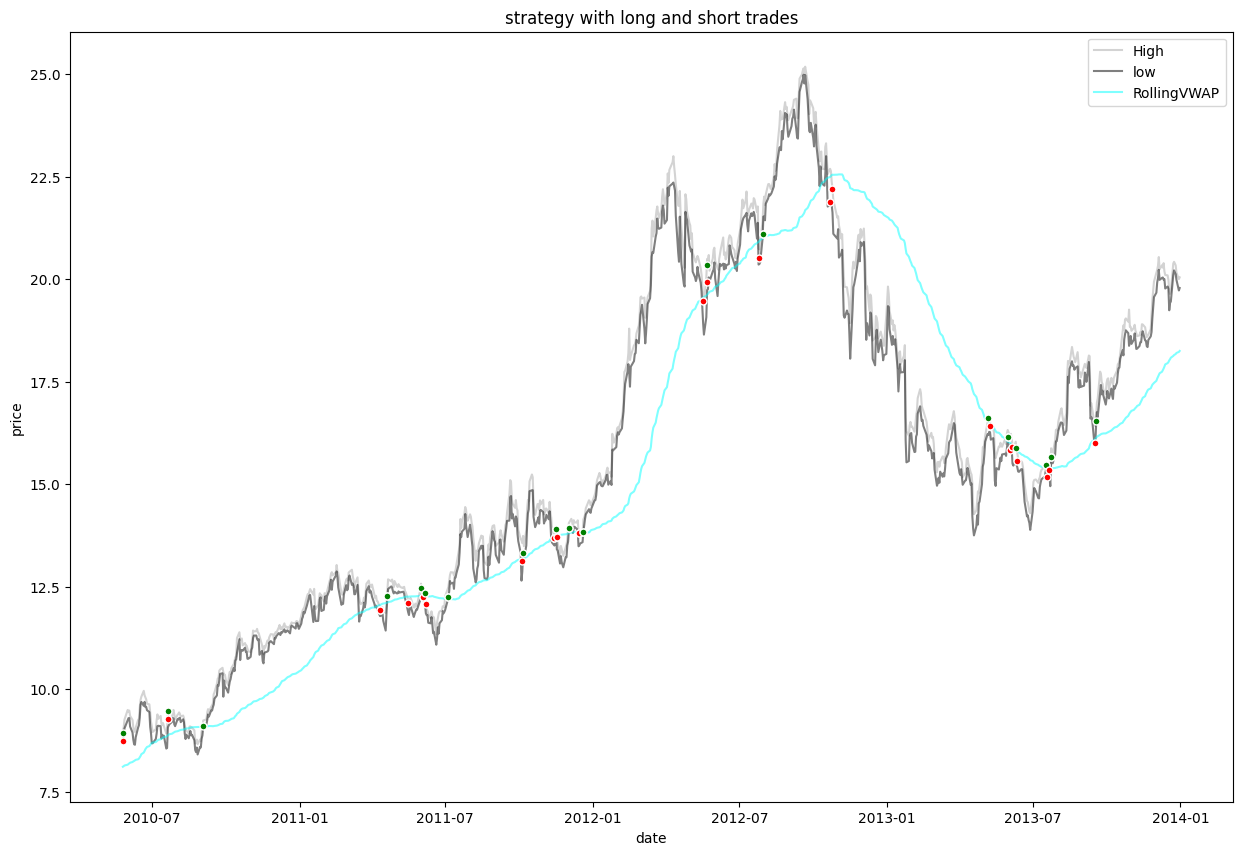

In [296]:
def plot_trades(ret,trade_df,indicator):
    fig, ax = plt.subplots(figsize =(15,10))
    ax.plot(ret['High'],c='lightgrey',label='High')
    ax.plot(ret['Low'],c = 'black',label='low',alpha = 0.5)
    ax.plot(ret[indicator],c='cyan',label=indicator,alpha=0.5)
    for index,row in trade_df.iterrows():
        if row['direction']=='long':
            ax.plot(row['entry date'], row['entry price'], marker='.', markersize=10, markeredgecolor="white", markerfacecolor="green")
            ax.plot(row['exit date'], row['exit price'], marker='.', markersize=10, markeredgecolor="white", markerfacecolor="red")
        else:
            ax.plot(row['entry date'], row['entry price'], marker='.', markersize=10, markeredgecolor="white", markerfacecolor="red")
            ax.plot(row['exit date'], row['exit price'], marker='.', markersize=10, markeredgecolor="white", markerfacecolor="green")

    ax.set_xlabel('date')
    ax.set_ylabel('price')
    ax.set_title('strategy with long and short trades')
    plt.legend()
    plt.show()
plot_trades(ret,trade_df,'RollingVWAP')

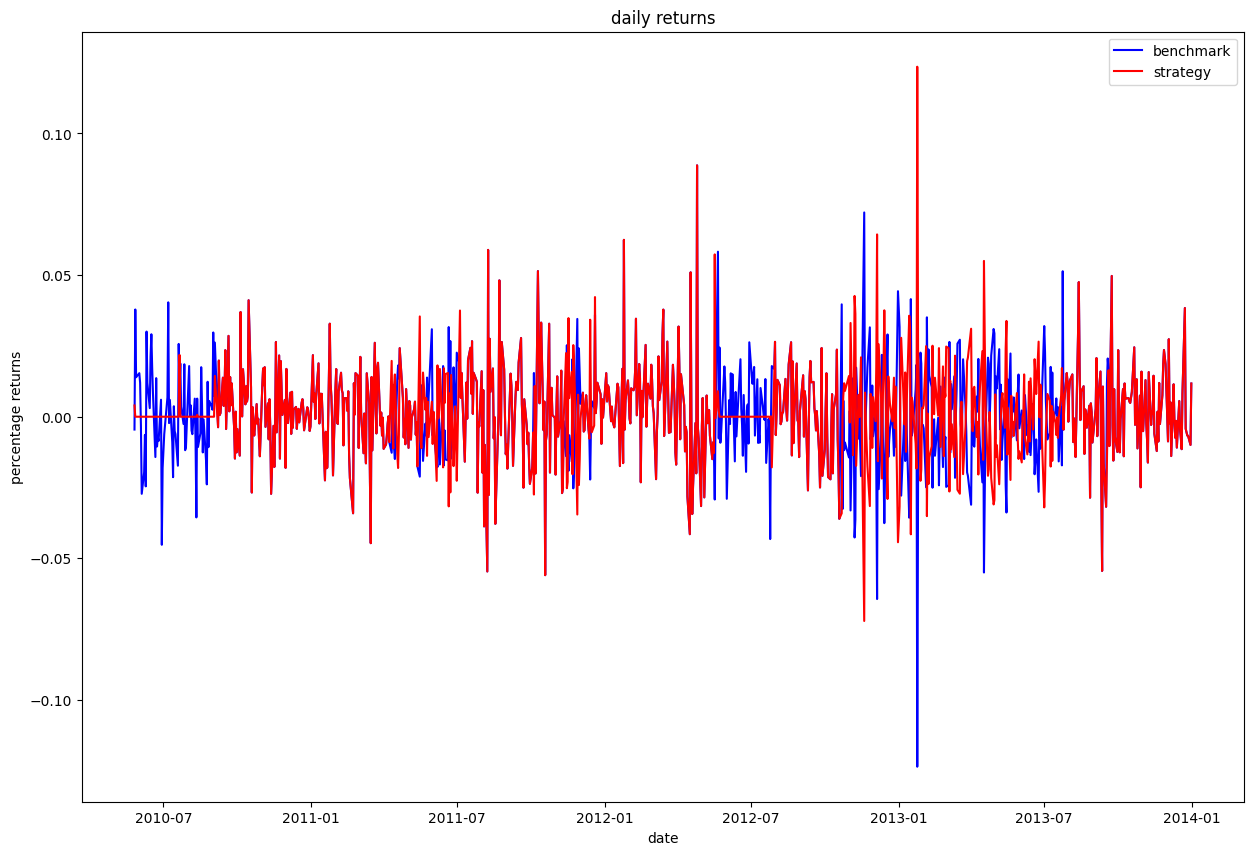

In [297]:
plt.figure(figsize=(15,10))
plt.plot(ret['returns'],c='blue',label='benchmark')
plt.plot(ret['strat_returns'],c='red',label='strategy')
plt.xlabel('date')
plt.ylabel('percentage returns')
plt.title('daily returns')
plt.legend()
plt.show()

In [298]:
def cumret(returns):
  return (returns+1).cumprod()

Text(0.5, 1.0, 'Excess returns over and above benchmark')

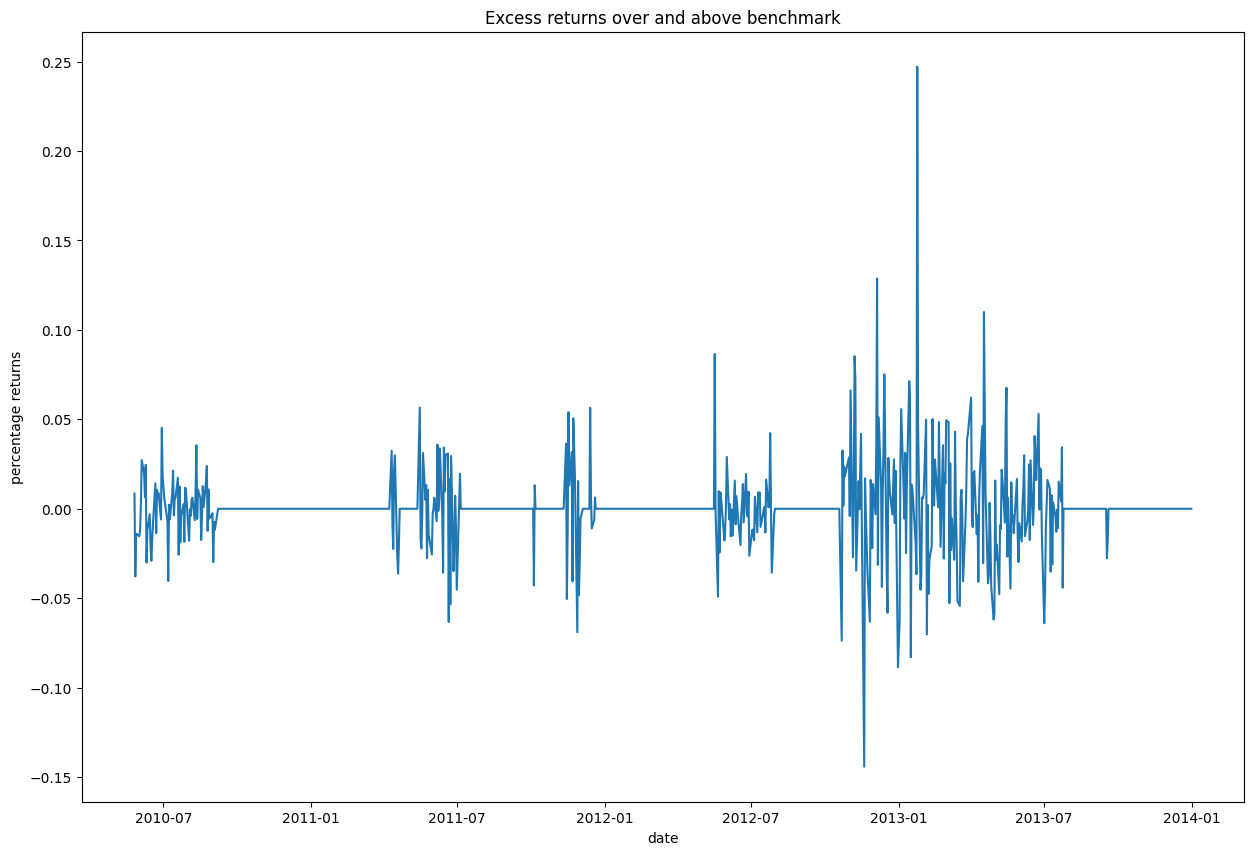

In [300]:
plt.figure(figsize=(15,10))
plt.plot(ret['strat_returns']-ret['returns'])
plt.xlabel('date')
plt.ylabel('percentage returns')
plt.title('Excess returns over and above benchmark')

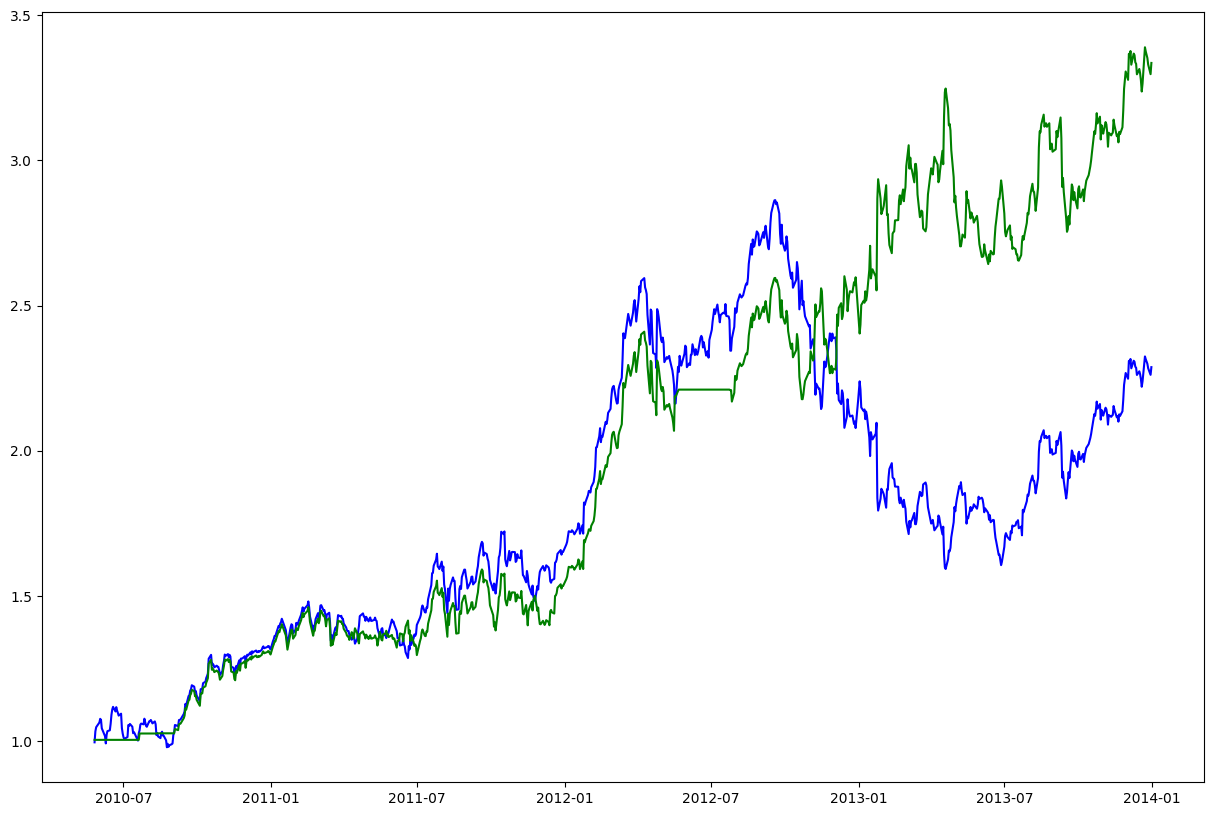

In [301]:
plt.figure(figsize=(15,10))
plt.plot(cumret(ret['returns']),c='blue')
plt.plot(cumret(ret['strat_returns']),c='green')
plt.show()

Below function gives us the drawdown and distribution plot for the returns of our bench mark and strategy on the asset

In [302]:
def sortino_ratio(series):
    # consider only returns less than 0
    downside = series.copy()
    downside[downside > 0] = 0
    return (series.mean())/downside.std(ddof=0)

def sharpe_ratio(series):
    return (series.mean()) / series.std(ddof=0)


In [303]:
import scipy.stats as stats

In [304]:
def statistics(df,get_plots=False,leverage=1):
  if isinstance(df, pd.DataFrame):
    """
    Calculates the drawdowns given a column of daily returns.
    Returns a pandas DataFrame with columns for daily returns,
    cumulative returns, and drawdowns.
    """
    # Calculate cumulative returns
    cum_returns = (1 + df.returns).cumprod()
    cum_returns_strat = (1 + df.strat_returns * leverage).cumprod()
    # Calculate the previous peaks
    previous_peaks = cum_returns.cummax()
    previous_peaks_strat = cum_returns_strat.cummax()

    # Calculate the drawdowns
    drawdowns = (cum_returns - previous_peaks) / previous_peaks
    drawdowns_strat = (cum_returns_strat - previous_peaks_strat) / previous_peaks_strat

    # Calculate the statistics of the drawdowns
    max_strat_drawdown = -drawdowns_strat.min()
    max_drawdown = -drawdowns.min()
    kurtosis = stats.kurtosis(-drawdowns)
    strat_kurtosis = stats.kurtosis(-drawdowns_strat)

    skewness = stats.skew(-drawdowns)
    strat_skewness = stats.skew(-drawdowns_strat)

    # Create a DataFrame with the results
    results = pd.DataFrame({'Cumulative Returns': cum_returns,
                            'Strategy Cumulative Returns': cum_returns_strat,
                            'Drawdowns': drawdowns,
                            'Strategy Drawdowns': drawdowns_strat})
    trade_stats={}
    trade_stats['mean_returns']={'benchmark':df.returns.mean(),'strategy':df.strat_returns.mean()}
    trade_stats['cummulative_returns']={'benchmark':cum_returns[-1],'strategy':cum_returns_strat[-1]}
    trade_stats['sharpe_ratio']={'benchmark':sharpe_ratio(df.returns),'strategy':sharpe_ratio(df.strat_returns)}
    trade_stats['sortino_ratio']={'benchmark':sortino_ratio(df.returns),'strategy':sortino_ratio(df.strat_returns)}
    trade_stats['max_drawdown']={'benchmark':max_drawdown,'strategy':max_strat_drawdown}
    trade_stats['drawdowns_kurtosis']={'benchmark':kurtosis,'strategy':strat_kurtosis}
    trade_stats['drawdowns_skewness']={'benchmark':skewness,'strategy':strat_skewness}

    if get_plots==False:
      return results,trade_stats
    fig,axs = plt.subplots(2,figsize=(15,15))
    axs[0].plot(results.iloc[:,:2],label=results.columns[:2])
    axs[0].set_title('cummulative returns')
    axs[0].set_ylabel('Returns')
    axs[0].set_xlabel('date')
    axs[0].legend()
    axs[1].plot(results.iloc[:,2:],label=results.columns[2:])
    axs[1].set_title('drawdown')
    axs[1].set_ylabel('drawdown')
    axs[1].set_xlabel('date')
    axs[1].legend()
    plt.show()
    return results,trade_stats
  else:
    print('invalid Datatype')
    return None



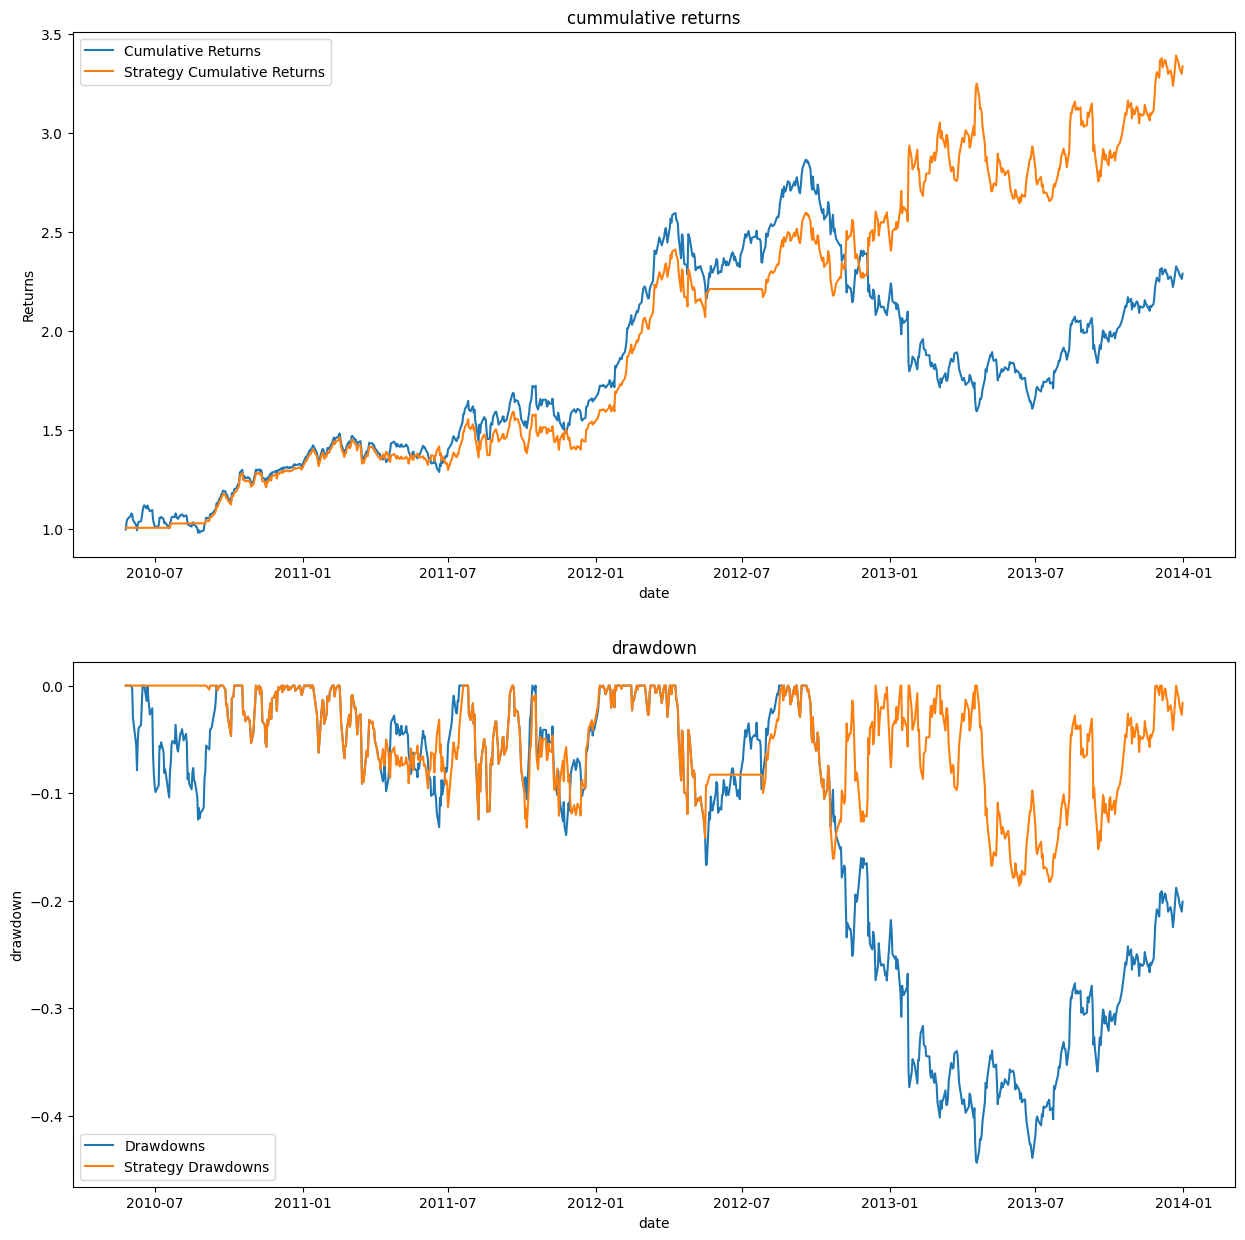

In [305]:
_,trade_stats=statistics(ret,True)

In [306]:
pd.DataFrame(trade_stats)

,mean_returns,cummulative_returns,sharpe_ratio,sortino_ratio,max_drawdown,drawdowns_kurtosis,drawdowns_skewness
benchmark,0.001061,2.287823,0.061743,0.104674,0.443769,-0.776434,0.848223
strategy,0.001460,3.335727,0.089874,0.161780,0.186173,-0.152128,0.774081


# Parameter Optimisation

In [307]:

VWAP_fixedstop_strategy_statistics=dict.fromkeys(sectors)
for sector in sectors[:2]:
  VWAP_fixedstop_strategy_statistics[sector]={}
  for stock in eval(sector+'_stocks'):
    print(stock)
    VWAP_fixedstop_strategy_statistics[sector][stock]={}
    for lookback in strat_lookbacks:
      VWAP_fixedstop_strategy_statistics[sector][stock][lookback]={}
      for stoploss in fixed_stoplosses:
        df,_=MA_crossover(stock,lookback,start,end,stoploss_pct=stoploss)
        _,trade_stats=statistics(df)
        VWAP_fixedstop_strategy_statistics[sector][stock][lookback][stoploss]=trade_stats


AAPL
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***

In [308]:
new_dict=VWAP_fixedstop_strategy_statistics['Tech']['AAPL']

In [309]:
def df_prep(new_dict):
  # Flatten the dictionary
  flat_dict = {(k1, k2, k3, k4): v 
              for k1, v1 in new_dict.items()
              for k2, v2 in v1.items()
              for k3, v3 in v2.items()
              for k4, v in v3.items()}

  # Convert the flattened dictionary to a DataFrame
  df = pd.DataFrame(flat_dict, index=[0])

  # Transpose the DataFrame so that each row corresponds to a key
  df = df.T.reset_index()

  # Rename the columns
  df.columns = ['lookback', 'stoploss', 'parameter', 'item', 'value']

  return df

In [310]:
df=df_prep(new_dict)

In [311]:
df

,lookback,stoploss,parameter,item,value
0,9,0.5,mean_returns,benchmark,0.001846
1,9,0.5,mean_returns,strategy,0.001043
2,9,0.5,cummulative_returns,benchmark,6.438433
3,9,0.5,cummulative_returns,strategy,3.275189
4,9,0.5,sharpe_ratio,benchmark,0.069206
...,...,...,...,...,...
667,200,5.0,max_drawdown,strategy,0.387172
668,200,5.0,drawdowns_kurtosis,benchmark,-0.448577
669,200,5.0,drawdowns_kurtosis,strategy,-0.565949
670,200,5.0,drawdowns_skewness,benchmark,0.804218


In [312]:
import seaborn as sns

In [313]:
def heat_map_plotter(df):
  # Filter rows where 'item' is 'strategy'
  df_strategy = df[df['item'] == 'strategy']
  df_benchmark = df[df['item'] == 'benchmark']

  # Get unique parameters
  parameters = df_strategy['parameter'].unique()

  # For each parameter
  for parameter in parameters:
      # Filter rows for this parameter
      df_parameter = df_strategy[df_strategy['parameter'] == parameter]
      benchmark = df_benchmark[df_benchmark['parameter'] == parameter].iloc[0,-1]
    
      # Reshape the DataFrame
      df_pivot = df_parameter.pivot(index='lookback', columns='stoploss', values='value')

      # Create the heatmap
      plt.figure(figsize=(10, 8))
      sns.heatmap(df_pivot, annot=True, fmt=".4f", cmap='coolwarm')
      plt.title(f'{parameter} for Strategy (benchmark value = {benchmark:.4f})')
      plt.show()

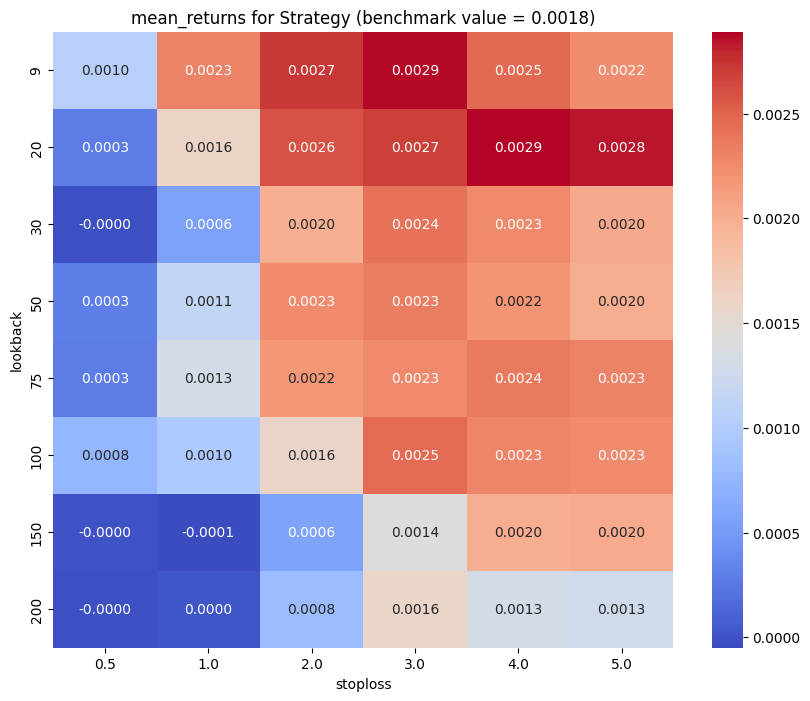

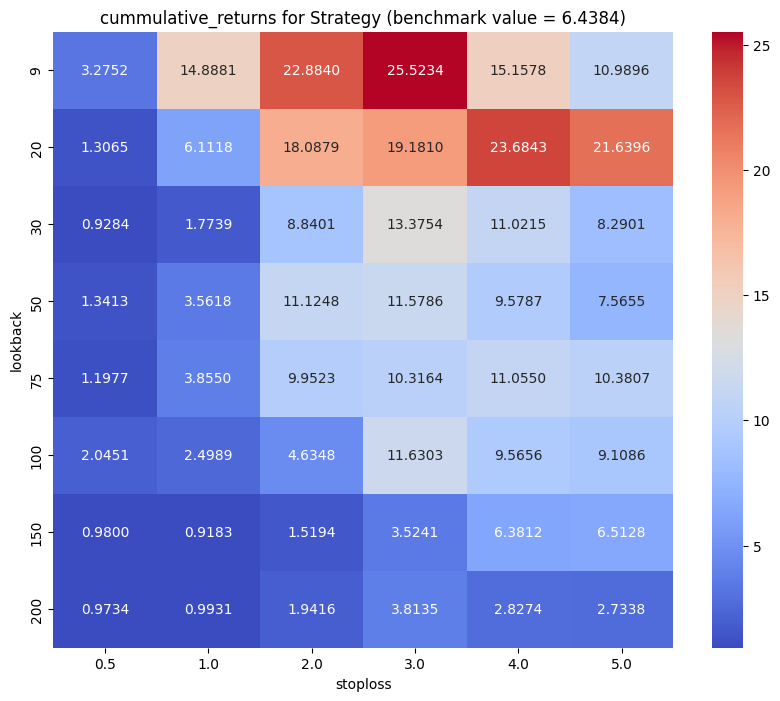

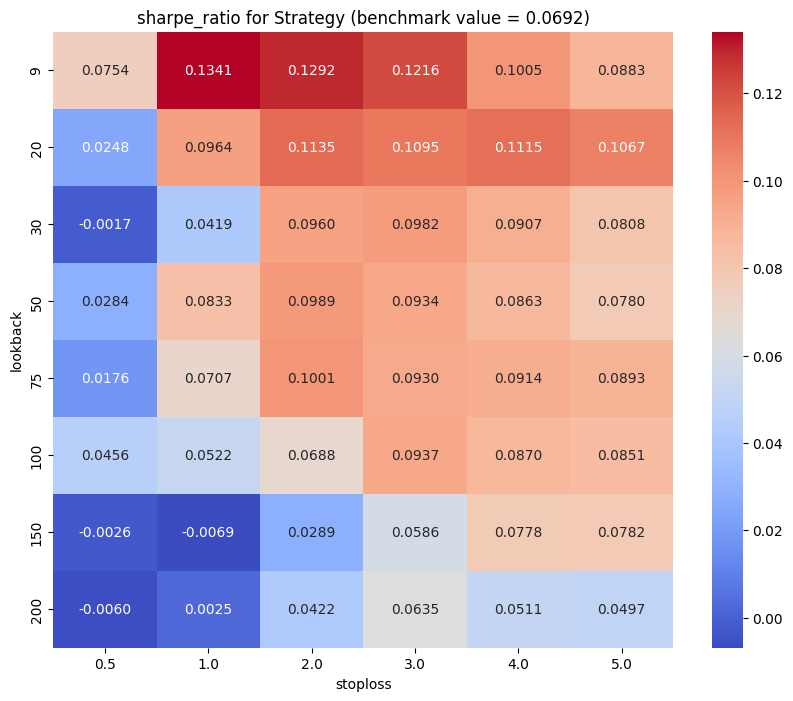

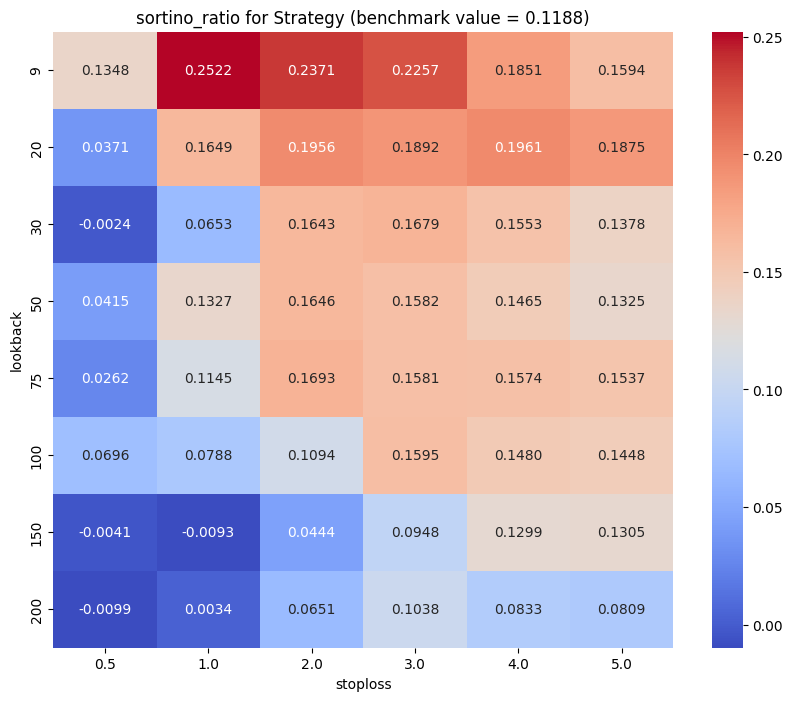

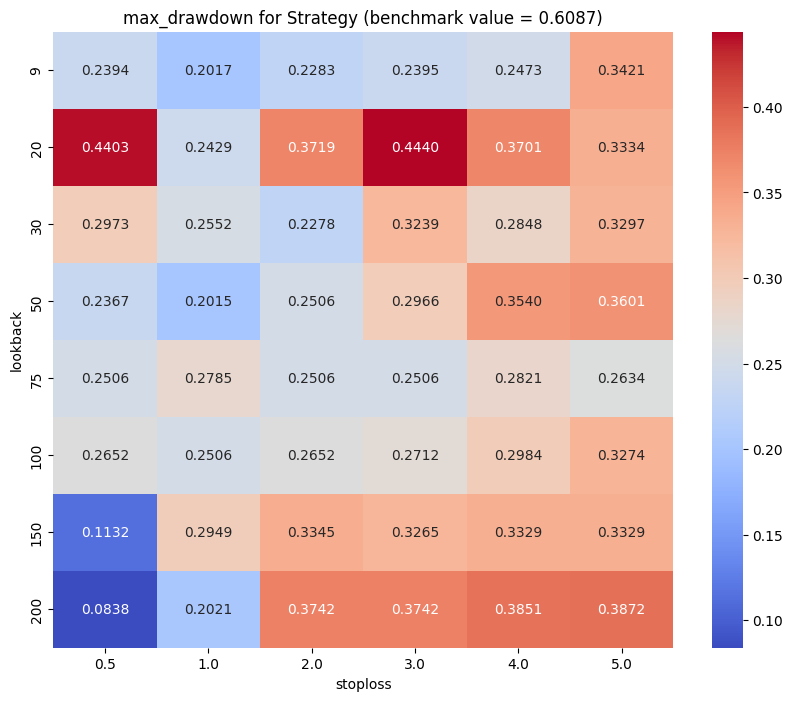

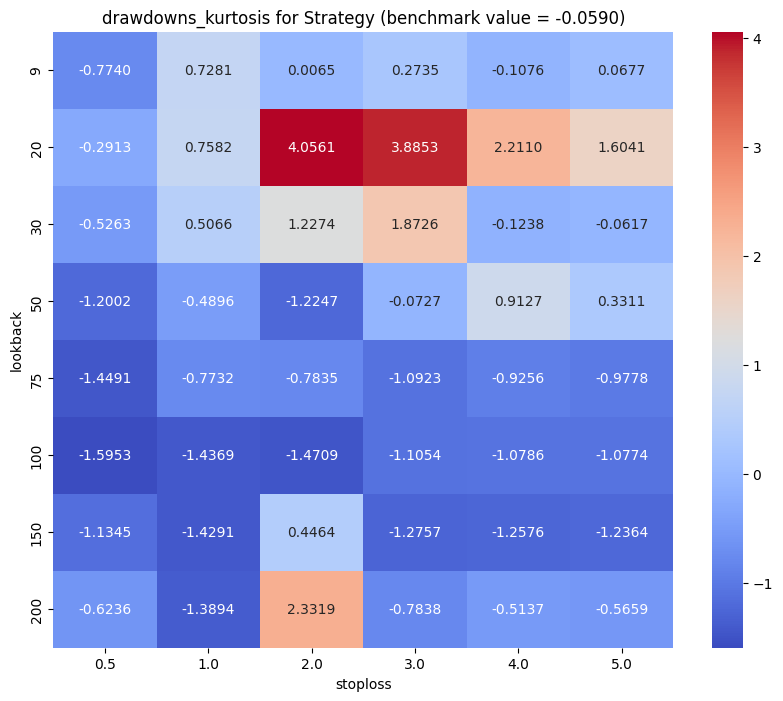

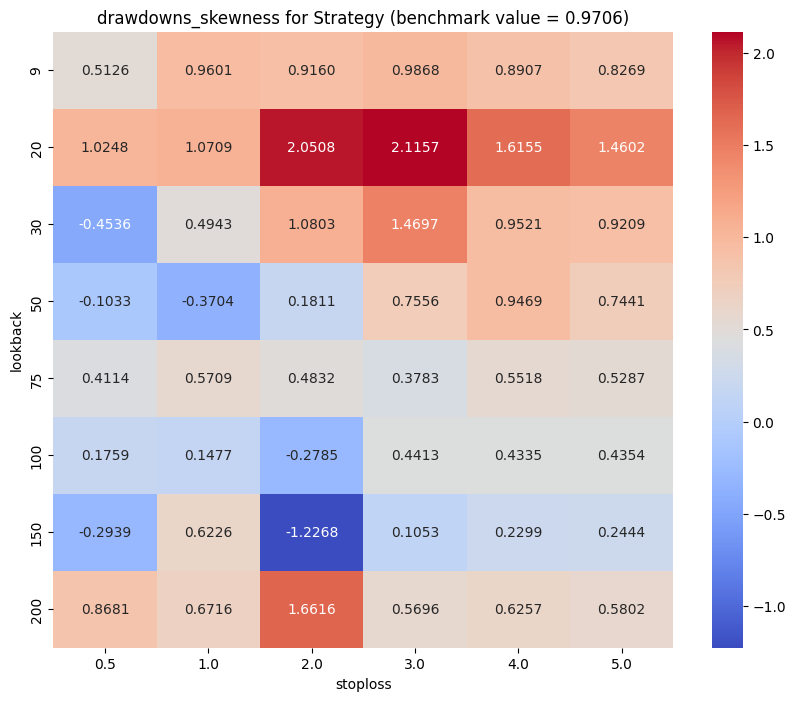

In [314]:
heat_map_plotter(df)

*  looking at the above heat mps we can pick the right combination based on our requirement we can also run this for more combinations and decide on which is the optimum value.
*   For leveraged futures trading we can pick out parameters with lower drawdowns and more positive skewness along with more negative kurtosis. 
*   Negative kurtosis means thinner tails so lesser high drawdown trades.
*   While directly trading the underlying we can maximise cummulative returns/mean_returns.

In [274]:
from sklearn.preprocessing import MinMaxScaler

def best_parameter(df,stock):
  # Filter rows where 'item' is 'strategy'
  df_strategy = df[df['item'] == 'strategy']
  df_benchmark = df[df['item'] == 'benchmark']
  # Pivot the DataFrame
  df_pivot = df_strategy.pivot_table(index=['lookback', 'stoploss'], columns='parameter', values='value')
  b_pivot = df_benchmark.pivot_table(index=['lookback', 'stoploss'], columns='parameter', values='value')
  # Reset index to make 'lookback' and 'stoploss' regular columns
  df_pivot.reset_index(inplace=True)

  parameters = ['max_drawdown', 'mean_returns', 'cummulative_returns', 'drawdowns_skewness', 'drawdowns_kurtosis','sharpe_ratio','sortino_ratio']

  # subtract the benchmark values from the table to calculate the score
  for parameter in parameters:
    df_pivot[parameter]=df_pivot[parameter]-b_pivot[parameter].values[0]

  scaler = MinMaxScaler()
  df_pivot[parameters] = scaler.fit_transform(df_pivot[parameters])


  # Calculate the score for each row
  # weigted scoring for returns - no weigthting for returns weighting of 3 for skewness and kurtosis and 10 for max drawdown.
  # scoring is negative for  max drawdown and skewness as we want to reduce these values and it is positive for rest 
  #W=[5,2,4,1,3]
  W = [1,1,1,1,1]

  df_pivot['score'] = (W[0]*df_pivot['max_drawdown'] + W[1]*df_pivot['drawdowns_skewness'] - W[2]*df_pivot['drawdowns_kurtosis'] + W[3]*df_pivot['sharpe_ratio'] + W[4]*df_pivot['sortino_ratio'])
  sns.heatmap(df_pivot.pivot_table(index='lookback', columns='stoploss', values='score'), cmap='coolwarm')
  plt.title(f'score heatmap for {stock}')
  plt.show()

  # Find the row with the maximum score
  best_row = df_pivot[df_pivot['score'] == df_pivot['score'].max()]
  best_lookback = best_row['lookback'].values[0]
  best_stoploss = best_row['stoploss'].values[0]
  # return the strategy and benchmark values for this paramaters 
  a = df_strategy[(df_strategy['lookback'] == best_lookback) & (df_strategy['stoploss'] == best_stoploss)]
  b = df_benchmark[(df_benchmark['lookback'] == best_lookback) & (df_benchmark['stoploss'] == best_stoploss)]
  a = a.pivot_table(index=['item','lookback', 'stoploss'], columns='parameter', values='value')
  b = b.pivot_table(index=['item','lookback', 'stoploss'], columns='parameter', values='value')
  a.reset_index(inplace=True)
  b.reset_index(inplace=True)
  final_df = pd.concat([a,b])
  #final_df['lookback']=[best_lookback,best_lookback]
  final_df.set_index('item',inplace=True)
  return final_df.to_dict('records')


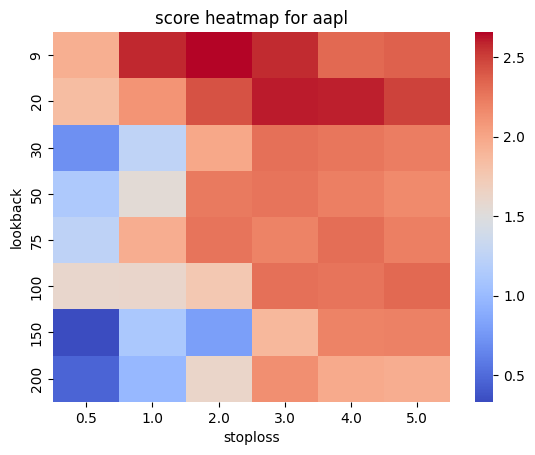

[{'lookback': 9,
  'stoploss': 2.0,
  'cummulative_returns': 23.05436201106334,
  'drawdowns_kurtosis': -0.010789600313922065,
  'drawdowns_skewness': 0.9124608867207522,
  'max_drawdown': 0.22447246277865357,
  'mean_returns': 0.0027322482347133742,
  'sharpe_ratio': 0.12950016331123232,
  'sortino_ratio': 0.23766671883854082},
 {'lookback': 9,
  'stoploss': 2.0,
  'cummulative_returns': 6.438433125593358,
  'drawdowns_kurtosis': -0.059002707481658145,
  'drawdowns_skewness': 0.9706275098295523,
  'max_drawdown': 0.6086674116426719,
  'mean_returns': 0.00184577657488463,
  'sharpe_ratio': 0.06920606273058075,
  'sortino_ratio': 0.11875422635662045}]

In [275]:
best_parameter(df,'aapl')

In [276]:
def parameter_search(dictionary,stock):
  df=df_prep(dictionary)
  return best_parameter(df,stock)


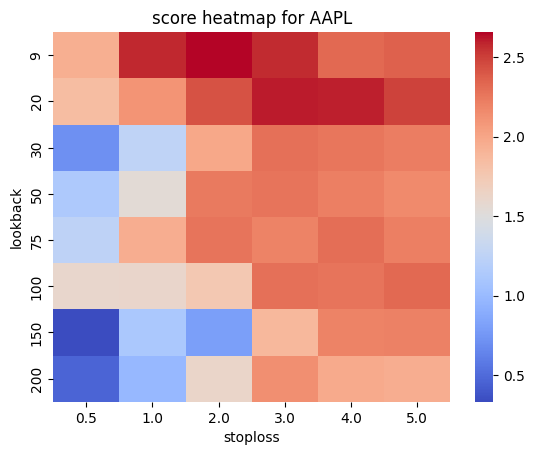

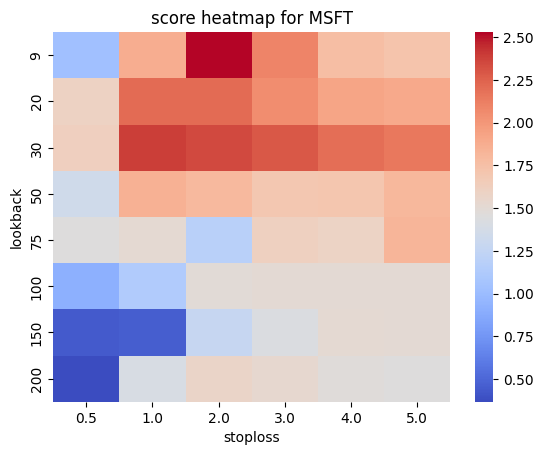

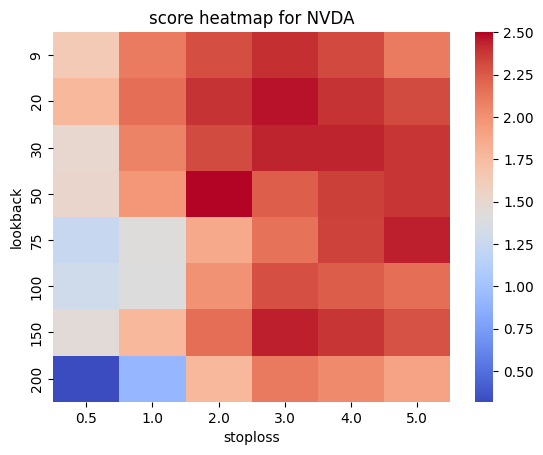

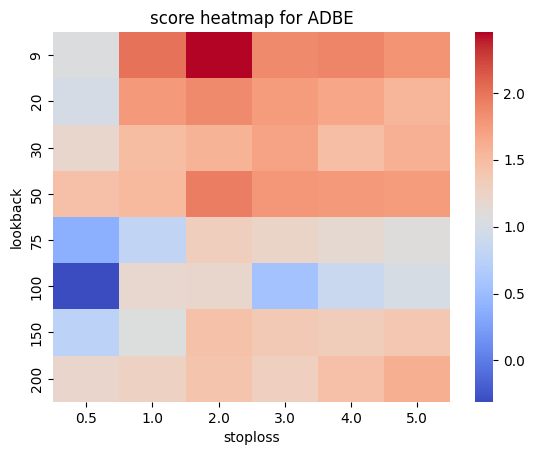

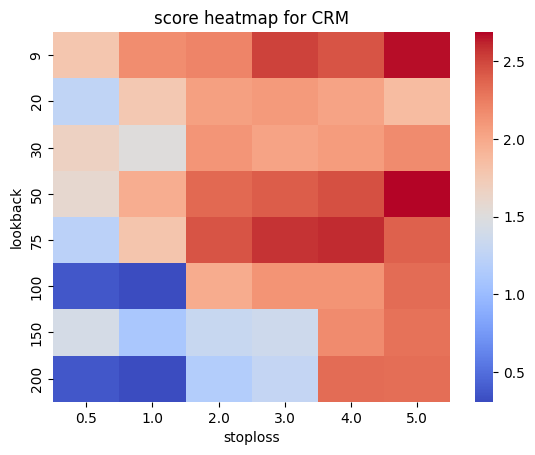

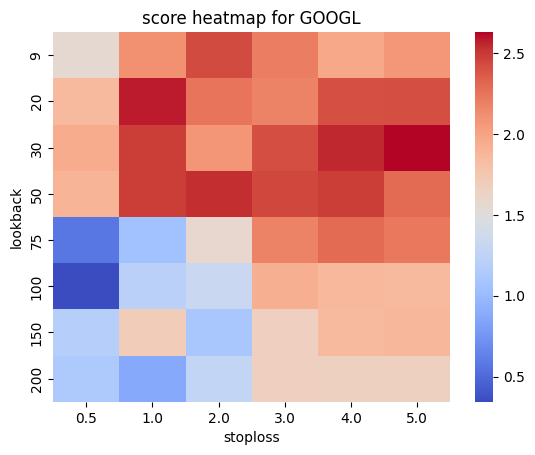

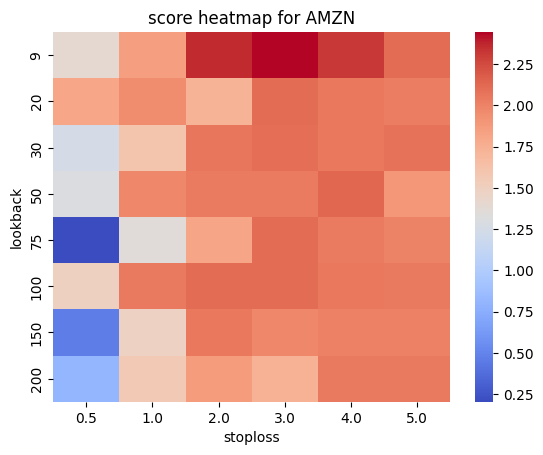

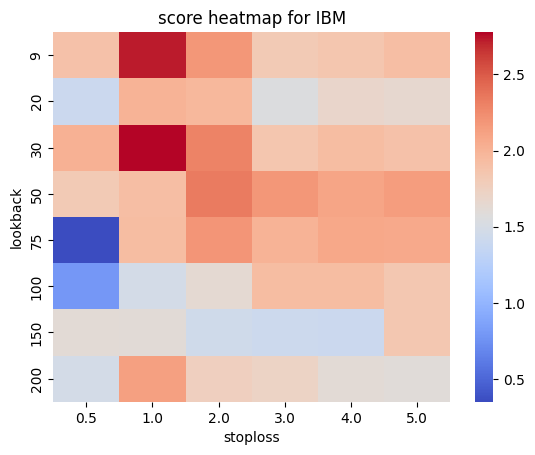

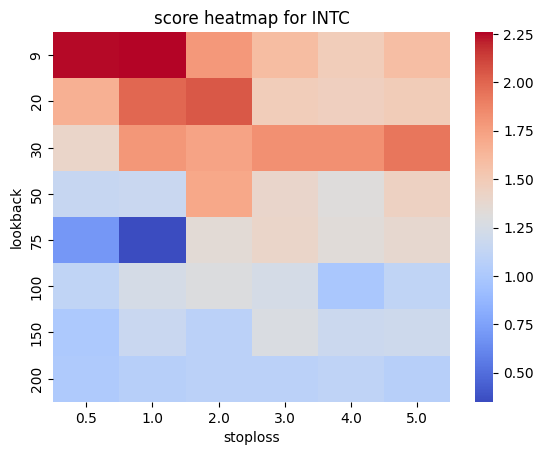

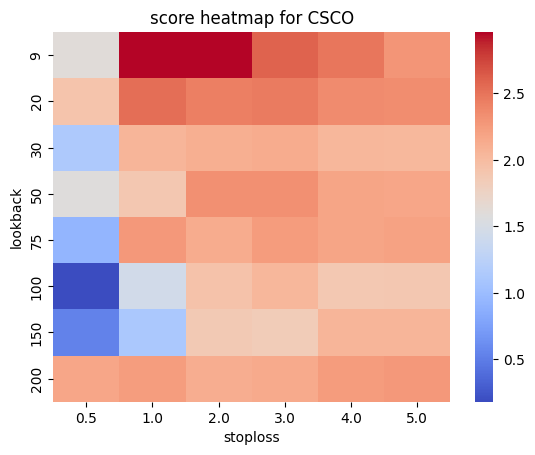

In [277]:
best_params={}
for sector in sectors[:1]:
  best_params[sector]={}
  for stock in eval(sector+'_stocks'):
    param_dict=parameter_search(VWAP_fixedstop_strategy_statistics[sector][stock],stock)
    best_params[sector][stock+' strategy']=param_dict[0]
    best_params[sector][stock+' benchmark']=param_dict[1]
params={}
for sector in sectors[:1]:
  params[sector]=pd.DataFrame(best_params[sector])



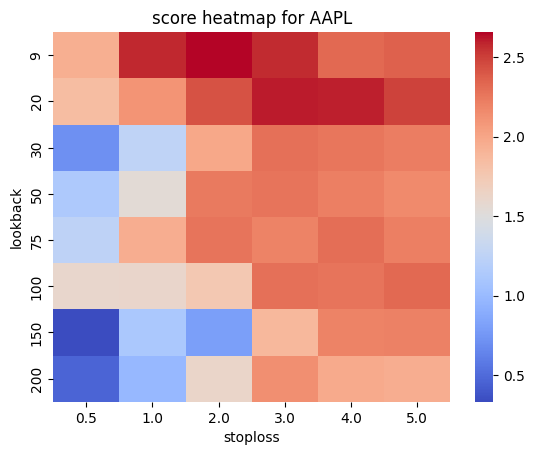

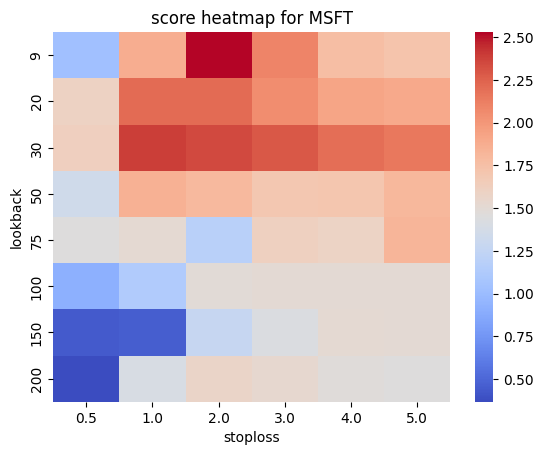

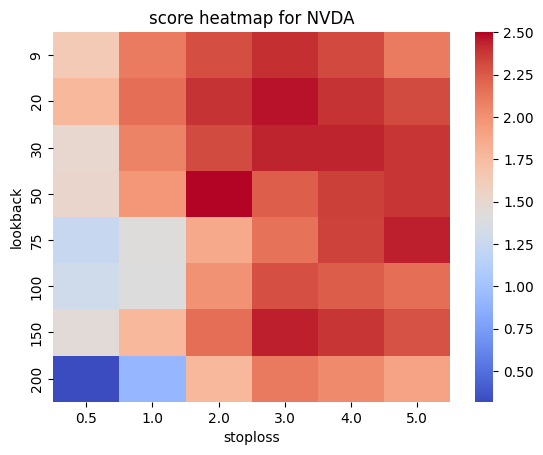

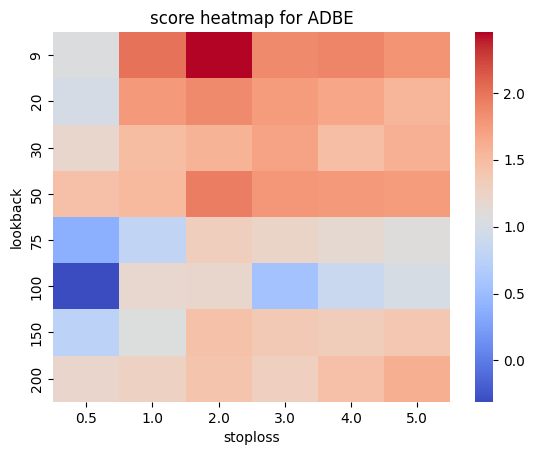

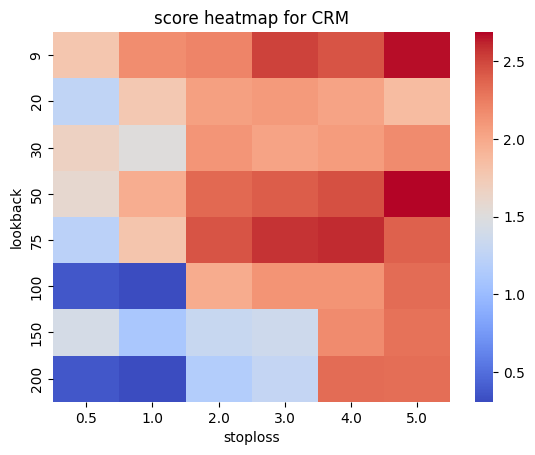

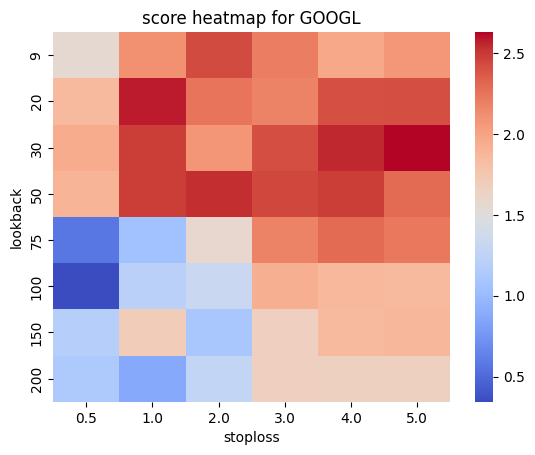

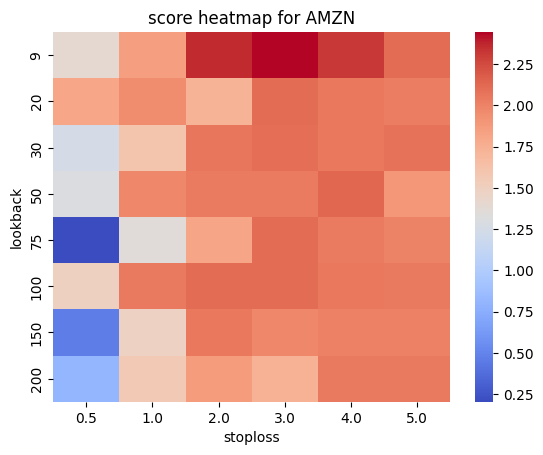

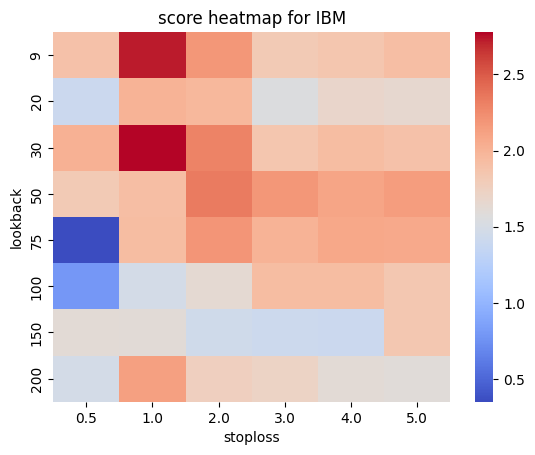

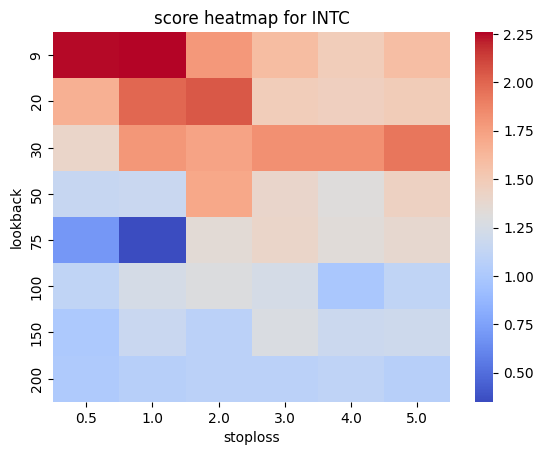

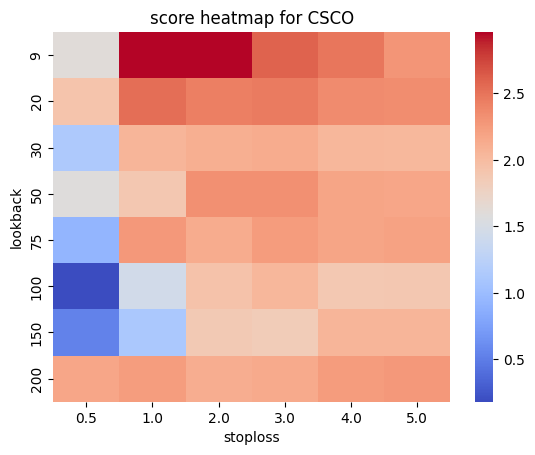

In [ ]:
best_params={}
for sector in sectors[:1]:
  best_params[sector]={}
  for stock in eval(sector+'_stocks'):
    param_dict=parameter_search(VWAP_fixedstop_strategy_statistics[sector][stock],stock)
    best_params[sector][stock+' strategy']=param_dict[0]
    best_params[sector][stock+' benchmark']=param_dict[1]
params={}
for sector in sectors[:1]:
  params[sector]=pd.DataFrame(best_params[sector])



In [278]:
params['Tech']

,AAPL strategy,AAPL benchmark,MSFT strategy,MSFT benchmark,NVDA strategy,NVDA benchmark,ADBE strategy,ADBE benchmark,CRM strategy,CRM benchmark,GOOGL strategy,GOOGL benchmark,AMZN strategy,AMZN benchmark,IBM strategy,IBM benchmark,INTC strategy,INTC benchmark,CSCO strategy,CSCO benchmark
lookback,9.000000,9.000000,9.000000,9.000000,50.000000,50.000000,9.000000,9.000000,50.000000,50.000000,30.000000,30.000000,9.000000,9.000000,30.000000,30.000000,9.000000,9.000000,9.000000,9.000000
stoploss,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
cummulative_returns,23.054362,6.438433,6.360667,1.138163,9.659128,2.166216,19.581119,1.247202,10.630751,4.747104,8.808963,3.308324,12.718393,3.180142,3.360564,1.403001,5.610319,0.880829,3.427383,1.264659
drawdowns_kurtosis,-0.010790,-0.059003,3.595922,-0.451734,-0.318193,-1.492241,0.433005,0.016619,-0.838663,-0.144428,-0.806621,-0.762033,3.527502,0.108553,-0.026167,0.419807,0.225083,-0.706032,-0.645565,-0.843615
drawdowns_skewness,0.912461,0.970628,2.076457,0.866884,1.062265,0.406830,0.927510,0.963171,0.711642,1.028980,0.725648,0.683783,1.992516,0.523530,1.080270,0.942338,1.007343,0.096101,0.857566,0.665843
max_drawdown,0.224472,0.608667,0.268136,0.591203,0.500764,0.850784,0.194539,0.667083,0.499194,0.704958,0.351968,0.652948,0.543088,0.652549,0.220241,0.448154,0.171672,0.579241,0.324053,0.600352
mean_returns,0.002732,0.001846,0.001633,0.000298,0.002353,0.001306,0.002569,0.000495,0.002431,0.001832,0.002021,0.001237,0.002366,0.001419,0.001064,0.000397,0.001477,0.000138,0.001134,0.000409
sharpe_ratio,0.129500,0.069206,0.093885,0.015070,0.075583,0.036050,0.131980,0.019566,0.078635,0.055227,0.090103,0.053633,0.090980,0.044690,0.084916,0.025426,0.105332,0.006322,0.065739,0.019399
sortino_ratio,0.237667,0.118754,0.152834,0.024914,0.130372,0.058595,0.246274,0.033271,0.136963,0.101669,0.153003,0.093358,0.171450,0.081554,0.145703,0.041948,0.195008,0.010189,0.110316,0.032805


#initial strategy hypothesis tests 

In [ ]:
from scipy.stats import ttest_rel
from scipy.stats import ranksums

In [ ]:
def strat_1tailed_test(group1,group2,print_results=False,plot_dist=False):
  if plot_dist:
    plt.hist(group1,bins=30,color="green",alpha=0.5)
    plt.hist(group2,bins=30,color="red",alpha=0.5)
    plt.show()
  
  _, p_value1 = shapiro(group1)
  _, p_value2 = shapiro(group2)
  if p_value1 > 0.01 and p_value2 > 0.01:
    if print_results:
      print("normally distributed")
      print("we can run a t-test")
    t_stat, p_value = ttest_rel(group1, group2, alternative='greater')
  else:
    if print_results:
      print("not normally distributed")
      print("we can run a Wilcox Rank Sum test")    
    t_stat, p_value = ranksums(group1, group2)
  if print_results:
    # check if one distribution is greater than the other
    if p_value < 0.05:
      if t_stat > 0:
          print('Strategy is profitable')
      else:
          print('Strategy is not profitable')
    else:
      print('There is no significant difference between the distributions.')
  return p_value,t_stat